### Agrupamentos: 🎰

Os agrupamentos se constitui de uma técnica de análise de dados, mas também de machine learning na qual um determinado modelo aprende de modo não supervisionado, por meio do nível de similaridade ou diferença dos dados, formando grupos que internamente sejam semelhantes e externamente, entre si, sejam diferentes.

É muito importante, para a realização dessa técnica, que os dados estejam padronizados por questões de escala, de modo que numa escala "pequena" a análise pode ser afetada negativamente, trazendo poucas informações. O algoritimo mais utilizado nessa área é o K-Means.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Carregando os dados para a análise:

df = sns.load_dataset("penguins")

df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
# Verificando dados missing:

df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [ ]:
# Verificando dados duplicados:

df.duplicated().sum()

0

In [ ]:
# Verificando a porção de dados que são NaN:

df[df.body_mass_g.isna()]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Como acerca dos NaN da massa não há nada nas outras linhas, irei excluí-las,
# pois pouco tem a oferecer à análise:

df.dropna(subset = ["body_mass_g"], inplace = True)

In [ ]:
pct_NaN = round(len(df[df.sex.isna()]) / df.shape[0], 3)*100
pct_NaN

# Como os dados faltantes em relação ao sexo dos pinguins representam
# um total de apenas 2.6 % aproximadamente, eu poderia excluir tais linhas,
# ainda que eu poderia, tendo em vista que há dados preenchidos em todas as colunas
# criar um modelo de machine learning que me ajudasse a prever o sexo dos bichos
# com base nelas.

2.6

In [ ]:
# Criando um dataframe que armazene apenas dados numéricos, como forma de
# criar o modelo de agrupamento:

df_quant = df.select_dtypes(include = "number")

df_quant.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


**Análise descritiva :**

Verificando se há algum padrão evidente nos dados.

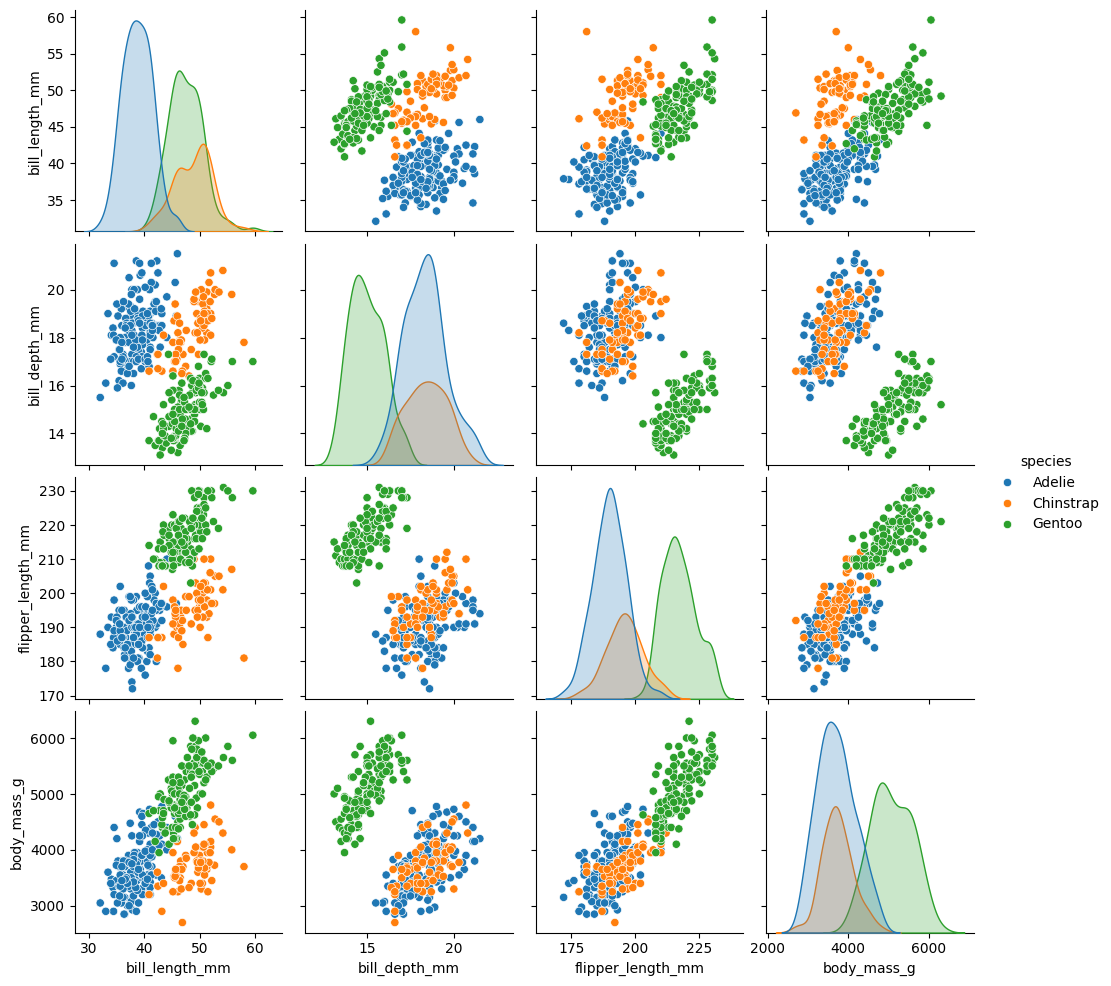

In [ ]:
sns.pairplot(df, hue = "species")

Mas o agrupamento trabalha apenas com dados quantitativos, então, para diferenciar as espécies sem usar a string "species" temos que criar grupos que receberam como rótulo determinados números.

In [ ]:
# Instanciando o modelo:
kmeans = KMeans(n_clusters = 3, max_iter = 600, algorithm = "auto")

# Treinando o modelo:
kmeans.fit(df_quant)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=3)

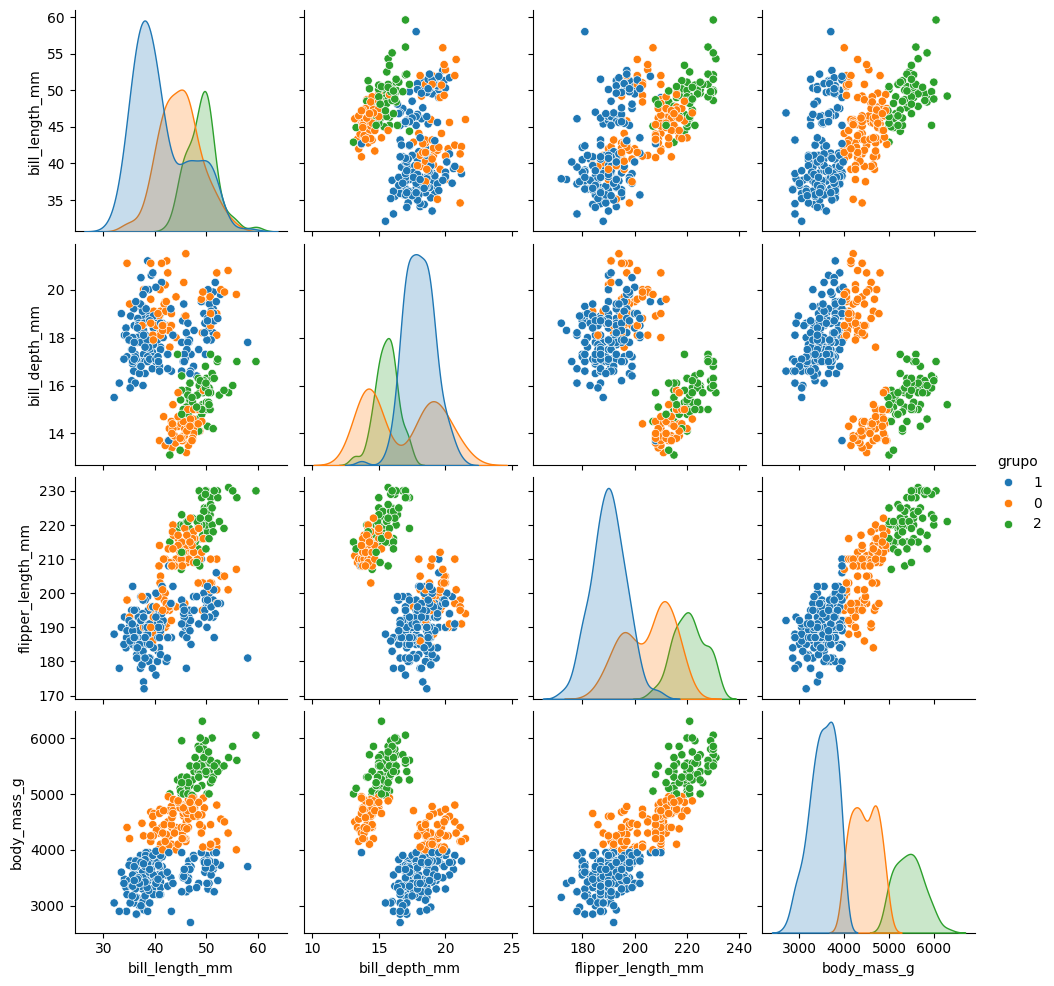

In [ ]:
# Criando grupos:

df["grupo"] = kmeans.labels_.astype('str')

sns.pairplot(df, hue = "grupo")


Analisando os gráficos, observa-se que, de verdade, ele tem pouco a dizer, tendo em vista que não verifica segmentação dos dados, o agrupamento, com exceção de alguns, sendo justamente aqueles que possuem uma maior escala. Como consertar isso? Para isso, utiliza-se da padronização, mencionada anteriormente.

In [ ]:
# Instanciando o normalizador:
padronizador = StandardScaler()

# Transformando o dataframe para a sua forma padronizada,
# garantindo a mesma escala para o conjunto de dados:
df_padronizado = padronizador.fit_transform(df_quant)

# Treinando o agrupamento:
kmeans.fit(df_padronizado)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='auto', max_iter=600, n_clusters=3)

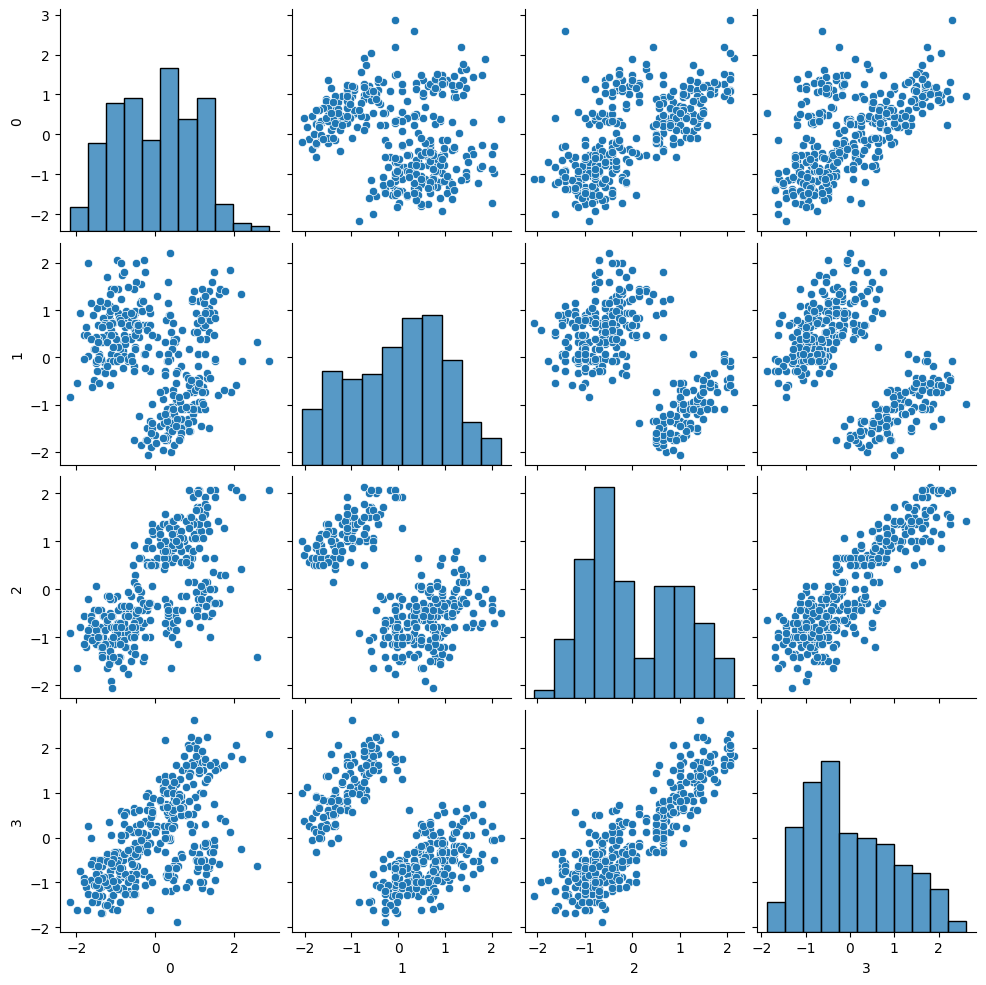

In [ ]:
sns.pairplot(pd.DataFrame(df_padronizado))

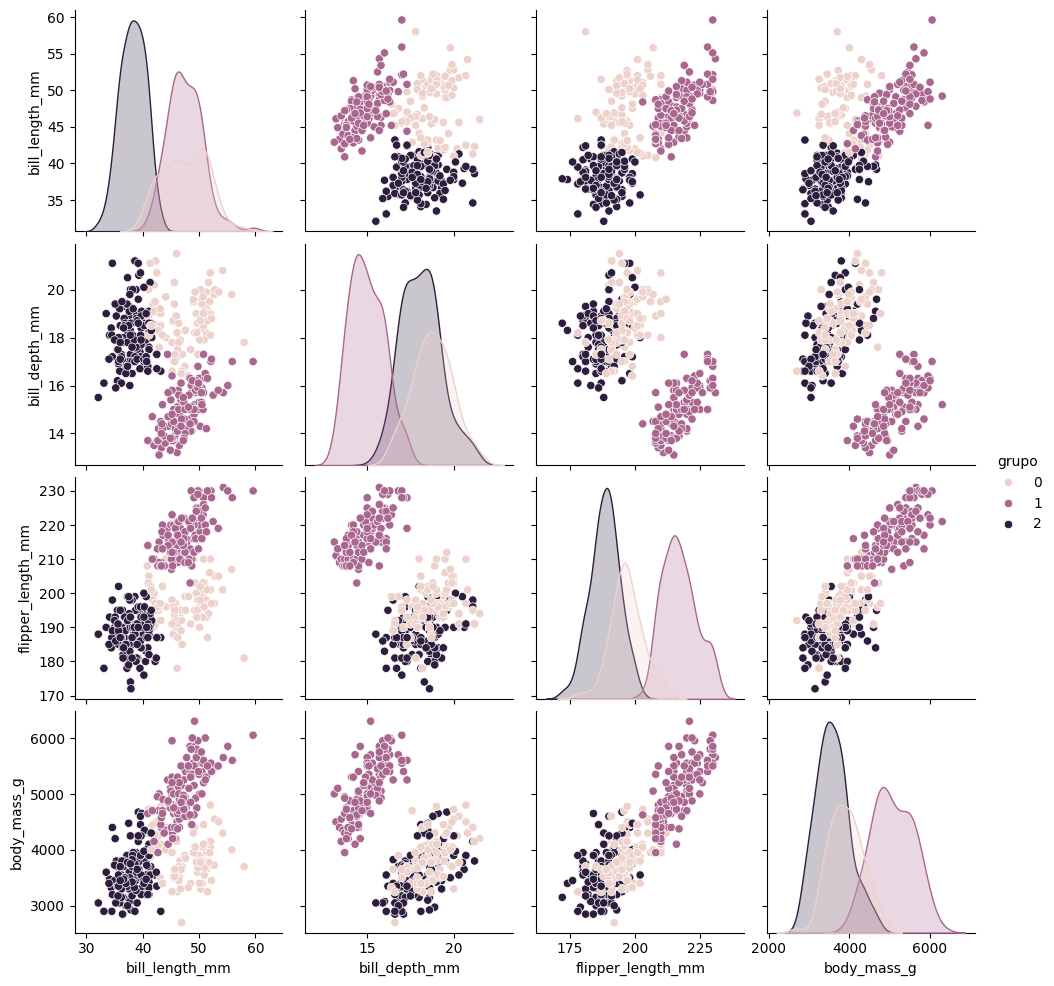

In [ ]:
# Aqui estou plotando a base de dados original, sendo o diferente apenas
# os grupos enquanto tal, de modo que esse provém do agrupamento do kmeans,
# realizado após a normalização dos dados.

df["grupo"] = kmeans.labels_

sns.pairplot(df, hue = "grupo")

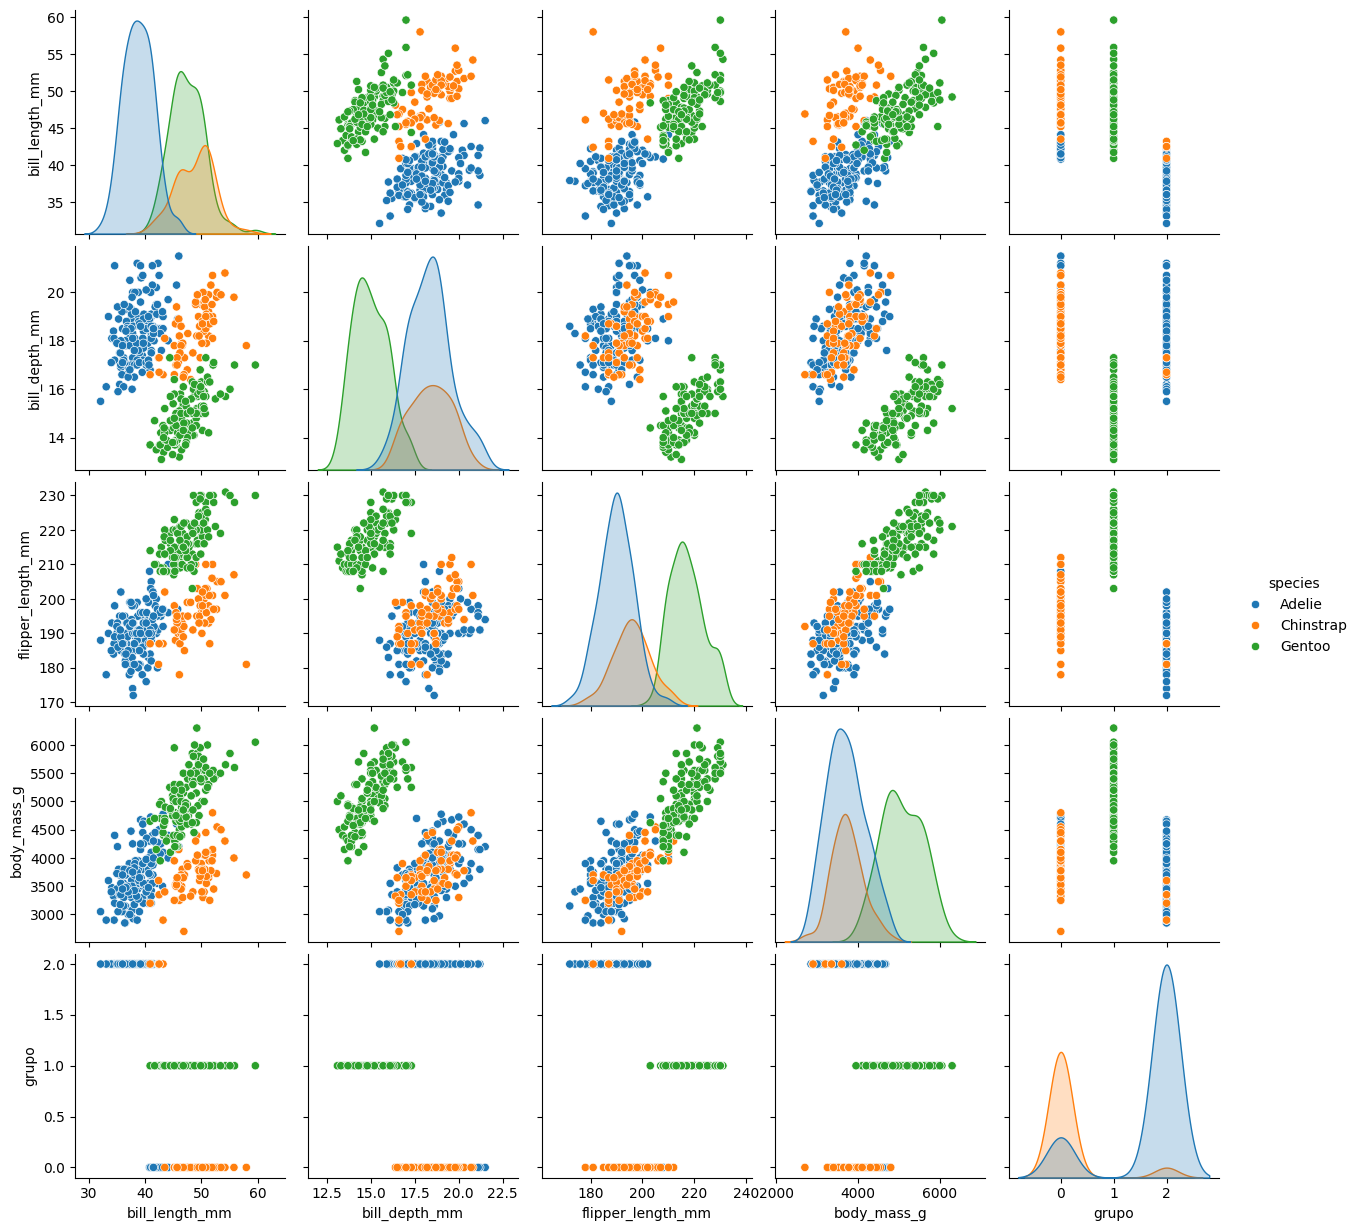

In [ ]:
# Verificando se há correspondência desse agrupamento perante o dado original:

sns.pairplot(df, hue = "species")

In [ ]:
pd.crosstab(df["species"], df["grupo"])

grupo,0,1,2
species,,,
Adelie,24,0,127
Chinstrap,63,0,5
Gentoo,0,123,0
